In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("books.csv")
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [4]:
df.describe(include=np.number)

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


In [5]:
df.describe(include="object")

,isbn10,title,subtitle,authors,categories,thumbnail,description
count,6810,6810,2381,6738,6711,6481,6548
unique,6810,6398,2009,3780,567,6481,6474
top,9042003405,The Lord of the Rings,A Novel,Agatha Christie,Fiction,http://books.google.com/books/content?id=2lVyR...,No Marketing Blurb
freq,1,11,226,37,2588,1,6


In [6]:
df.isnull().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

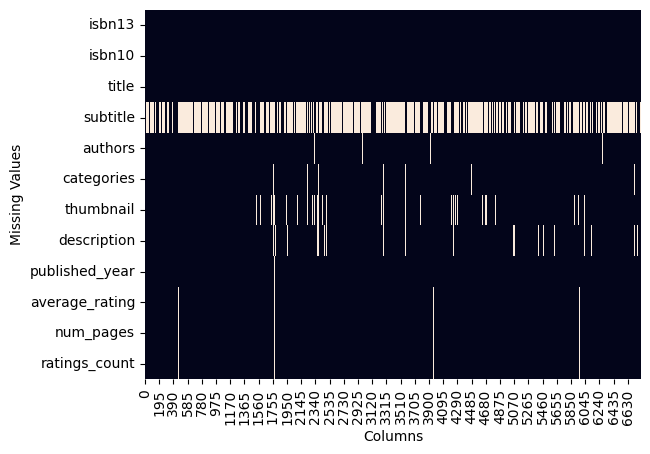

In [7]:
ax = plt.axes()
sns.heatmap(df.isna().transpose(), cbar=False, ax = ax)

plt.xlabel("Columns")
plt.ylabel("Missing Values")

plt.show()

In [8]:
df["missing_description"] = np.where(df["description"].isna(), 1, 0)
df["age_of_book"] = 2026 - df["published_year"]

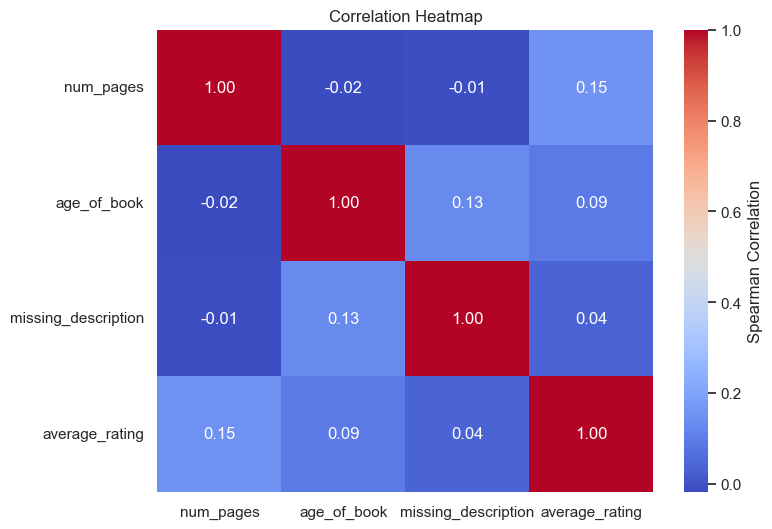

In [9]:
columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]

correlation_matrix = df[columns_of_interest].corr(method="spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={"label": "Spearman Correlation"})

heatmap.set_title("Correlation Heatmap")
plt.show()

In [10]:
df_clean = df.dropna(
    subset=["description", "average_rating", "num_pages", "published_year"]
)

In [11]:
df_clean.isnull().sum()

isbn13                    0
isbn10                    0
title                     0
subtitle               4226
authors                  63
categories               33
thumbnail               214
description               0
published_year            0
average_rating            0
num_pages                 0
ratings_count             0
missing_description       0
age_of_book               0
dtype: int64

In [12]:
category_counts = df_clean["categories"].value_counts().reset_index().sort_values("count", ascending=False)

category_counts

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
519,Aeronautics,1
518,Childbirth,1
517,Consumer behavior,1
516,Seduction,1


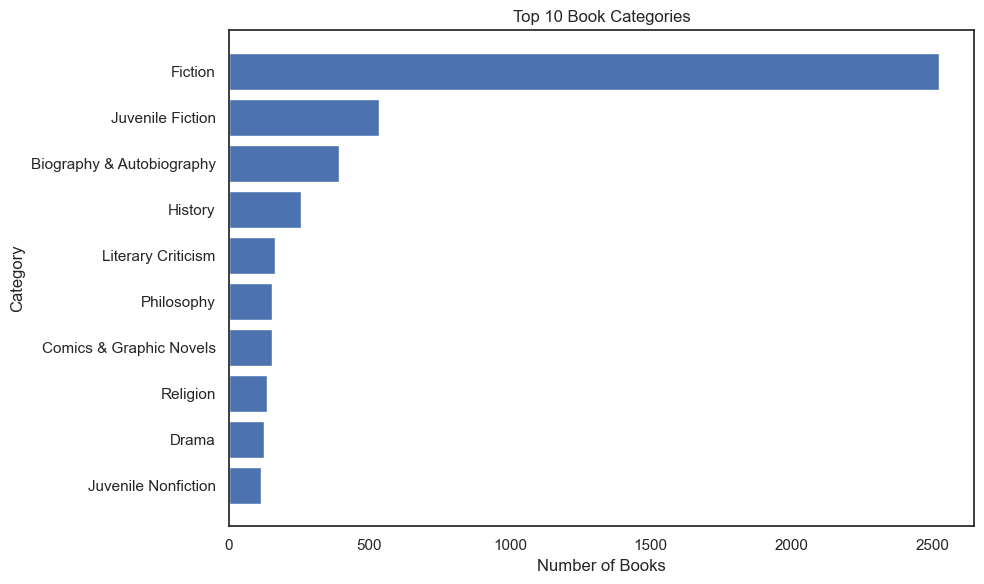

In [13]:
top_categories = category_counts.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_categories["categories"], top_categories["count"])
plt.xlabel("Number of Books")
plt.ylabel("Category")
plt.title("Top 10 Book Categories")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [15]:
df_clean = df_clean.copy()
df_clean.loc[:, "words_in_description"] = (
    df_clean["description"].str.split().str.len()
).copy()

In [16]:
df_clean[["description", "words_in_description"]].head()

,description,words_in_description
0,A NOVEL THAT READERS and critics have been eag...,199
1,A new 'Christie for Christmas' -- a full-lengt...,205
2,Volume Two of Stephen Donaldson's acclaimed se...,14
3,"A memorable, mesmerizing heroine Jennifer -- b...",57
4,Lewis' work on the nature of love divides love...,45


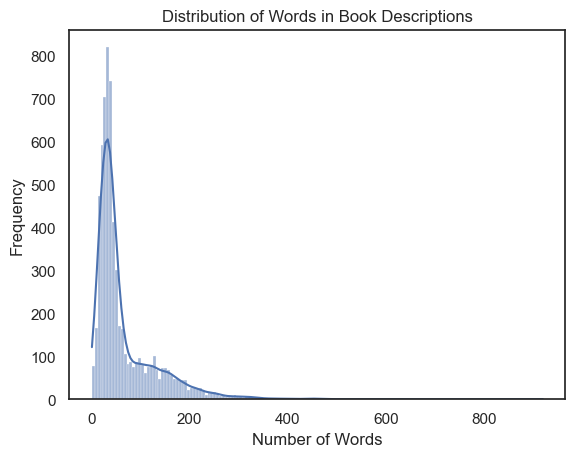

In [17]:
sns.histplot(data=df_clean, x="words_in_description", kde=True)

plt.title("Distribution of Words in Book Descriptions")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [18]:
bins = [0, 5, 15, 25, 35, 50, 100, 500]
labels = ["1–4", "5–14", "15–24", "25–34", "35–49", "50–99", "100+"]

df_clean.loc[:, "description_length_bin"] = pd.cut(
    df_clean["words_in_description"],
    bins=bins,
    labels=labels,
    ordered=True
)

df_clean["description_length_bin"].value_counts(sort=False).to_frame()

,count
description_length_bin,
1–4,66
5–14,384
15–24,969
25–34,1263
35–49,1436
50–99,1017
100+,1367


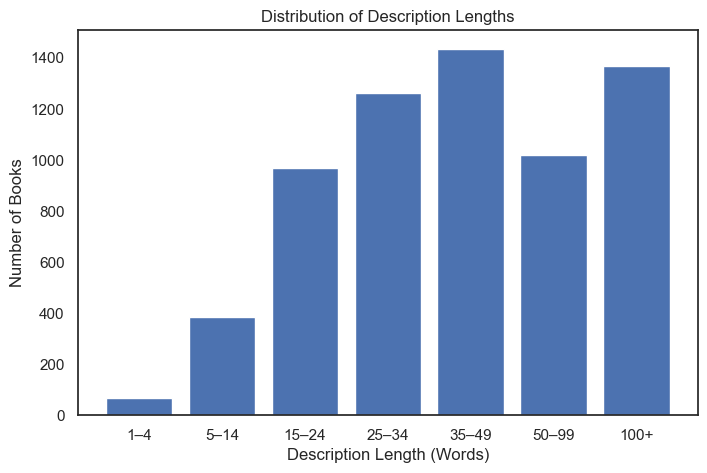

In [19]:
counts = (
    df_clean["description_length_bin"]
    .value_counts(sort=False)
    .reset_index()
)

counts.columns = ["description_length_bin", "count"]

plt.figure(figsize=(8, 5))
plt.bar(counts["description_length_bin"], counts["count"])
plt.xlabel("Description Length (Words)")
plt.ylabel("Number of Books")
plt.title("Distribution of Description Lengths")
plt.show()

In [20]:
df_clean = df_clean[df_clean["words_in_description"] >= 25]

In [21]:
df_clean.loc[:, "title_and_subtitle"] = (
    df_clean["title"] + ": " + df_clean["subtitle"].fillna("")
).str.rstrip(": ").copy()

df_clean[["title", "subtitle", "title_and_subtitle"]].head()

,title,subtitle,title_and_subtitle
0,Gilead,NaN,Gilead
1,Spider's Web,A Novel,Spider's Web: A Novel
3,Rage of angels,NaN,Rage of angels
4,The Four Loves,NaN,The Four Loves
5,The Problem of Pain,NaN,The Problem of Pain


In [22]:
df_clean.loc[:, "tagged_description"] = (
    df_clean["isbn13"].astype(str) + " " + df_clean["description"]
).copy()

df_clean[["isbn13", "description", "tagged_description"]].head()

,isbn13,description,tagged_description
0,9780002005883,A NOVEL THAT READERS and critics have been eag...,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,A new 'Christie for Christmas' -- a full-lengt...,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,"A memorable, mesmerizing heroine Jennifer -- b...","9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,Lewis' work on the nature of love divides love...,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,"""In The Problem of Pain, C.S. Lewis, one of th...","9780006280934 ""In The Problem of Pain, C.S. Le..."


In [23]:
df_clean.drop(columns=["subtitle", "missing_description", "age_of_book", "words_in_description", "description_length_bin"], axis=1).to_csv("books_cleaned.csv", index=False)